In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import dateutil
from pandas import date_range
from pandas import DataFrame
import os
import sklearn
from sklearn import datasets
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
os.getcwd()

'C:\\Users\\Arunakiry Natarajan\\Desktop\\DataScience\\DiabeticData'

##### reading the data sets

In [2]:
cgm = pd.read_csv("C:\\Users\\Arunakiry Natarajan\\Desktop\\DataScience\\DiabeticData\\1_CGM.csv")
beddit = pd.read_csv("C:\\Users\\Arunakiry Natarajan\\Desktop\\DataScience\\DiabeticData\\beddit_pandas.csv")
location = pd.read_csv("C:\\Users\\Arunakiry Natarajan\\Desktop\\DataScience\\DiabeticData\\4_masked_locations_final.csv")
steps = pd.read_csv("C:\\Users\\Arunakiry Natarajan\\Desktop\\DataScience\\DiabeticData\\steps.csv")

cgm.head(1)



,date,time,am/pm,Historic_ Glucose,Scan_Glucose
0,10/1/2017 0:00,6:34,PM,72.0,NaN


In [3]:
beddit.head(2)

,end_timestamp_date,end_timestamp_time,start_timestamp_date,start_timestamp_time,sleep_duration,away_duration,wake_duration
0,10/18/2017,4:16:39,10/17/2017,20:45:13,25898,0,360
1,10/17/2017,4:40:40,10/16/2017,21:01:27,22611,678,4263


In [4]:
location.head(2)

,end_time,start_time,time_spent H:MM,type
0,10/6/2017 17:12,10/6/2017 12:28,4:44,place 1
1,11/9/2017 14:57,11/9/2017 13:00,1:57,place 1


In [5]:
steps.head(2)

,date,Time,active_time,distance,steps
0,10/29/2017 0:00,8:36:00 PM,5035,6741,8897
1,10/28/2017 0:00,7:26:00 PM,4527,5389,7486


##### checking for null values

In [6]:
cgm.isnull().sum()

date                    0
time                    0
am/pm                   0
Historic_ Glucose     949
Scan_Glucose         5892
dtype: int64

In [7]:
beddit.isnull().sum()

end_timestamp_date      0
end_timestamp_time      0
start_timestamp_date    0
start_timestamp_time    0
sleep_duration          0
away_duration           0
wake_duration           0
dtype: int64

In [8]:
location.isnull().sum()

end_time            0
start_time          0
time_spent\nH:MM    0
type                0
dtype: int64

In [10]:
steps.isnull().sum()

date           0
Time           0
active_time    0
distance       0
steps          0
dtype: int64

##### checking for unique data points

In [9]:
cgm["date"]. unique().sum()

'10/1/2017 0:0010/2/2017 0:0010/3/2017 0:0010/4/2017 0:0010/5/2017 0:0010/6/2017 0:0010/7/2017 0:0010/8/2017 0:0010/9/2017 0:0010/10/2017 0:0010/11/2017 0:0010/12/2017 0:0010/13/2017 0:0010/14/2017 0:0010/15/2017 0:0010/16/2017 0:0010/17/2017 0:0010/18/2017 0:0010/19/2017 0:0010/20/2017 0:0010/21/2017 0:0010/22/2017 0:0010/23/2017 0:0010/24/2017 0:0010/25/2017 0:0010/26/2017 0:0010/27/2017 0:0010/28/2017 0:0010/29/2017 0:0010/30/2017 0:0010/31/2017 0:0011/1/2017 0:0011/2/2017 0:0011/3/2017 0:0011/4/2017 0:0011/5/2017 0:0011/6/2017 0:0011/7/2017 0:0011/8/2017 0:0011/9/2017 0:0011/10/2017 0:0011/11/2017 0:0011/12/2017 0:0011/13/2017 0:0011/14/2017 0:0011/15/2017 0:0011/16/2017 0:0011/17/2017 0:0011/18/2017 0:0011/19/2017 0:0011/20/2017 0:0011/21/2017 0:0011/22/2017 0:0011/23/2017 0:0011/24/2017 0:0011/25/2017 0:0011/26/2017 0:0011/27/2017 0:0011/28/2017 0:0011/29/2017 0:0011/30/2017 0:0012/1/2017 0:0012/2/2017 0:0012/3/2017 0:0012/4/2017 0:0012/5/2017 0:00'

In [10]:
beddit["end_timestamp_date"].unique().sum()

'10/18/201710/17/201710/16/201711/10/201711/9/201711/8/201711/7/201711/6/201711/5/201711/4/201711/2/201711/1/201710/30/201710/29/201710/28/201710/27/201710/26/201710/21/201710/20/201710/19/201710/15/201710/14/201710/13/201710/12/201710/11/201710/10/201710/9/201710/8/201710/7/201710/6/201710/5/2017'

In [11]:
location["end_time"].unique().sum()

'10/6/2017 17:1211/9/2017 14:5711/7/2017 6:2710/13/2017 6:4611/11/2017 13:1611/2/2017 11:3911/1/2017 13:4311/9/2017 13:0010/11/2017 6:3310/13/2017 14:1511/14/2017 14:2610/19/2017 11:0210/9/2017 7:2610/27/2017 13:5211/4/2017 15:1311/11/2017 18:0210/20/2017 13:5211/2/2017 16:0610/11/2017 5:2810/26/2017 11:5510/12/2017 5:2510/9/2017 5:2510/15/2017 10:3310/21/2017 8:1710/29/2017 16:3711/3/2017 8:1811/9/2017 9:3710/12/2017 13:5310/10/2017 12:5811/14/2017 7:0410/20/2017 15:1610/14/2017 12:0411/8/2017 14:1310/25/2017 16:2411/4/2017 16:2710/20/2017 6:2210/19/2017 12:4811/9/2017 6:2711/8/2017 12:0011/8/2017 6:2310/7/2017 12:4110/12/2017 18:1110/10/2017 6:2110/26/2017 19:0810/26/2017 16:3011/12/2017 15:2910/19/2017 5:2810/8/2017 10:3010/6/2017 12:1210/16/2017 5:3611/1/2017 15:1910/6/2017 10:1910/10/2017 5:3211/6/2017 6:2811/13/2017 18:2610/28/2017 9:4711/7/2017 14:5211/3/2017 17:5510/29/2017 11:4910/5/2017 13:3211/13/2017 8:3611/12/2017 9:5410/28/2017 7:4010/9/2017 10:5910/9/2017 16:4011/6/2017 

In [12]:
##steps["updated_timestamp"].unique()
##array(['10/29/17 20:36', '10/28/17 19:26', '10/27/17 20:37',
       '10/26/17 21:41', '10/25/17 21:12', '10/24/17 20:41',
       '10/23/17 20:18', '10/22/17 19:13', '10/21/17 20:58',
       '10/20/17 20:48', '10/19/17 19:46', '10/18/17 21:30',
       '10/17/17 20:18', '11/3/17 11:01', '11/2/17 21:50',
       '11/1/17 22:07', '10/31/17 19:27', '10/30/17 22:19',
       '10/16/17 18:20', '10/15/17 20:21', '10/14/17 20:11',
       '10/13/17 21:59', '10/12/17 20:42', '10/11/17 20:50',
       '10/10/17 20:04', '10/9/17 19:40', '10/8/17 21:45',
       '10/7/17 19:27', '10/6/17 20:58', '10/5/17 18:59'], dtype=object)##

IndentationError: unexpected indent (<ipython-input-12-8eaffce6baa3>, line 3)

##### the year format does not match the rest of the data's year format. i have to manually correct the year format similar to the other datasets.

In [14]:
steps["date"].unique()

array(['10/29/2017 0:00', '10/28/2017 0:00', '10/27/2017 0:00',
       '10/26/2017 0:00', '10/25/2017 0:00', '10/24/2017 0:00',
       '10/23/2017 0:00', '10/22/2017 0:00', '10/21/2017 0:00',
       '10/20/2017 0:00', '10/19/2017 0:00', '10/18/2017 0:00',
       '10/17/2017 0:00', '11/3/2017 0:00', '11/2/2017 0:00',
       '11/1/2017 0:00', '10/31/2017 0:00', '10/30/2017 0:00',
       '10/16/2017 0:00', '10/15/2017 0:00', '10/14/2017 0:00',
       '10/13/2017 0:00', '10/12/2017 0:00', '10/11/2017 0:00',
       '10/10/2017 0:00', '10/9/2017 0:00', '10/8/2017 0:00',
       '10/7/2017 0:00', '10/6/2017 0:00', '10/5/2017 0:00'], dtype=object)

##### Corrected the year format to other tables

##### Removing the null values in the "cgm" table using the scan glucose values

In [ ]:
# Since scan and Historic_ Glucose levels equivalent measures, I populated the null values in the Historic_ Glucose withe the values in the Scan_Glucose 

In [13]:
##removing the null values in 1_CGM and filling them with scan glucose values
cgm.loc[cgm['Historic_ Glucose'].isnull(), 'Historic_ Glucose'] = cgm ['Scan_Glucose']

In [14]:
cgm.isnull().sum()

date                    0
time                    0
am/pm                   0
Historic_ Glucose       3
Scan_Glucose         5892
dtype: int64

In [15]:
cgm.head(2)

,date,time,am/pm,Historic_ Glucose,Scan_Glucose
0,10/1/2017 0:00,6:34,PM,72.0,NaN
1,10/1/2017 0:00,6:49,PM,63.0,NaN


##### 1_CGM grouped by date and calculated mean

In [16]:
cgm_1 = cgm.loc[:,("date", "Historic_ Glucose")]

In [17]:
cgm_datemean = cgm_1.groupby('date',as_index=False).mean()

In [18]:
cgm_datemean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 2 columns):
date                 66 non-null object
Historic_ Glucose    66 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


##### type of data in date is a string

In [21]:
type(cgm_datemean.loc[0,"date"])

str

##### splititng the time (0:00) from date

In [22]:
cgm_datemean.loc[0,"date"].split(" ")[0]

'10/1/2017'

In [ ]:
 ##### applying the lambda function to split at "space region of the string"

In [23]:
cgm_datemean["date"] = cgm_datemean["date"].apply(lambda x: x.split(" ")[0])

In [24]:
cgm_datemean.head()

,date,Historic_ Glucose
0,10/1/2017,86.900000
1,10/10/2017,171.954545
2,10/11/2017,116.264151
3,10/12/2017,174.356522
4,10/13/2017,134.169811


##### old version

In [ ]:
cgm.groupby('date').groups.keys()
cgm_date_mean = cgm.groupby('date')['Historic_ Glucose'].mean()
cgm_date_mean.head()

##### beddit data processing

In [36]:
beddit.head(2)

,end_timestamp_date,end_timestamp_time,start_timestamp_date,start_timestamp_time,sleep_duration,away_duration,wake_duration
0,10/18/2017,4:16:39,10/17/2017,20:45:13,25898,0,360
1,10/17/2017,4:40:40,10/16/2017,21:01:27,22611,678,4263


##### keeping the required columns

In [25]:
beddit_clean1 = beddit.loc[:,["end_timestamp_date","sleep_duration","away_duration","wake_duration"]]

##### changing the name of the column "end_timestamp_date" to "date"

In [26]:
beddit_clean1 = beddit_clean1.rename(columns = {"end_timestamp_date":"date"})

In [ ]:
beddit_clean1.head(2)

##### merging cgm and beddit data at the "date"

In [27]:
cgm_beddit = cgm_datemean.merge(beddit_clean1,how = "inner", left_on = "date",right_on = "date")

In [28]:
cgm_beddit.head(2)

,date,Historic_ Glucose,sleep_duration,away_duration,wake_duration
0,10/10/2017,171.954545,26717,0,0
1,10/11/2017,116.264151,30374,0,480


##### loading the locations data and processing steps are similar to beddit data

In [29]:
location.head(2)

,end_time,start_time,time_spent H:MM,type
0,10/6/2017 17:12,10/6/2017 12:28,4:44,place 1
1,11/9/2017 14:57,11/9/2017 13:00,1:57,place 1


In [30]:
location_1 = location.loc[:,("end_time", "type")]

In [31]:
type(location_1.loc[0,"end_time"])


str

In [32]:
location_1.loc[0, "end_time"].split(" "),[0]


(['10/6/2017', '17:12'], [0])

In [34]:
location_1["end_time"] = location_1["end_time"].apply(lambda x: x.split(" ")[0])

In [48]:
location_1.head(2)

,end_time,type
0,10/6/2017,place 1
1,11/9/2017,place 1


##### Merging cgm, beddit and locations tables with relation to time

In [35]:
cgm_beddit_location = cgm_beddit.merge(location_1, how= "inner", left_on = "date", right_on = "end_time")

In [36]:
cgm_beddit_location.head(2)

,date,Historic_ Glucose,sleep_duration,away_duration,wake_duration,end_time,type
0,10/10/2017,171.954545,26717,0,0,10/10/2017,place 1
1,10/10/2017,171.954545,26717,0,0,10/10/2017,place 1


In [37]:
cgm_beddit_location.shape

(171, 7)

##### loading and processing steps data

In [52]:
steps.head(2)

,date,Time,active_time,distance,steps
0,10/29/2017 0:00,8:36:00 PM,5035,6741,8897
1,10/28/2017 0:00,7:26:00 PM,4527,5389,7486


In [53]:
type(steps.loc[0,"date"])

str

In [54]:
steps.loc[0,"date"].split(" ")[0]

'10/29/2017'

In [55]:
steps["date"] = steps["date"].apply(lambda x: x.split(" ")[0])
steps.head(2)

,date,Time,active_time,distance,steps
0,10/29/2017,8:36:00 PM,5035,6741,8897
1,10/28/2017,7:26:00 PM,4527,5389,7486


In [56]:
cgm_beddit_location_steps = cgm_beddit_location.merge (steps, how = "inner", right_on = "date", left_on = "date")

In [57]:
cgm_beddit_location_steps.shape

(144, 11)

##### the final master table joined by date in the "cgm" data and related to corresponding other data points

In [116]:
cgm_beddit_location_steps.head(2)

,date,Historic_ Glucose,sleep_duration,away_duration,wake_duration,end_time,type,Time,active_time,distance,steps
0,10/10/2017,171.954545,26717,0,0,10/10/2017,place 1,8:04:00 PM,7548,10671,13786
1,10/10/2017,171.954545,26717,0,0,10/10/2017,place 1,8:04:00 PM,7548,10671,13786


In [141]:
cgm_beddit_location_steps.isnull().sum()

date                 0
Historic_ Glucose    0
sleep_duration       0
away_duration        0
wake_duration        0
end_time             0
type                 0
Time                 0
active_time          0
distance             0
steps                0
dtype: int64

In [142]:
describe(cgm_beddit_location_steps)

NameError: name 'describe' is not defined

In [130]:
cgm_beddit_location_steps.loc[0,'date'] = int(cgm_beddit_location_steps.loc[0,'date'])

ValueError: invalid literal for int() with base 10: '10/10/2017'

##### creatting clusters

In [139]:
plt.style.use('ggplot')
plt.ion


<function matplotlib.pyplot.ion>

##### plot distribution of Historic_Glucose

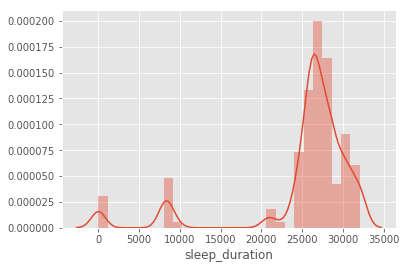

In [136]:
sns.distplot(cgm_beddit_location_steps['sleep_duration'])

In [101]:
f_numeric = ['sleep_duration','away_duration','wake_duration','end_time','type','Time','active_time','distance','steps']
target = ['date']
x = cgm_beddit_location_steps[f_numeric]
y = cgm_beddit_location_steps['date']


In [106]:
cgm_beddit_location_steps_train, cgm_beddit_location_steps_test, y_train, y_test = train_test_split(cgm_beddit_location_steps, y, test_size=0.2, random_state=42)

In [113]:
clf = tree.DecisionTreeRegressor(max_depth=2)
clf = clf.fit(X_train, y_train)

ValueError: could not convert string to float: '8:36:00 PM'

In [105]:
f_numeric = ['season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed']
target = ['count']
X = df[f_numeric]
y = df['count']

NameError: name 'df' is not defined

In [82]:
for i in range(cgm_beddit_location_steps.shape[1]):
    for j in range(i+1, cgm_beddit_location_steps.shape[1]):
        fig = plt.figure()
        plt.scatter(cgm_beddit_location_steps[:, i], cgm_beddit_location_steps[:, j])
        plt.xlabel(cgm_datemean[i])
        plt.ylabel(cgm_beddit_location_steps[j])

TypeError: unhashable type: 'slice'

##### Creating test and train data

In [72]:
X_train,X_test = train_test_split(cgm_beddit_location_steps,test_size = 0.1, random_state = 20)

In [80]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

print(kmeans.cluster_centers_)

ValueError: could not convert string to float: '8:36:00 PM'

In [59]:
##beddit data grouped by end date
##beddit.groupby('end_timestamp_date').groups.keys()
###beddit_end_date_mean = beddit.groupby('end_timestamp_date')['sleep_duration','wake_duration'].mean()
###print (beddit_end_date_mean)


In [60]:
#applying lambda function

#cgm['Time'].apply(lambda x:datetime.strptime(x,'%m/%d/%Y 0:00'))


In [61]:
#merging the two tables with the common dates and using other columns as references

In [62]:
#beddit_end_date_mean.merge(cgm_date_mean.to_frame(),left_on=["end_timestamp_date"], right_on=[''],how ='inner')
##df1.merge(df2[['*.S']].to_frame(), left_on='id', right_index=True)

In [63]:
cgm.groupby(['date']).groups.keys()
cgm.groupby(axis=1, level=('date').sum()


SyntaxError: unexpected EOF while parsing (<ipython-input-63-465fc649850c>, line 2)

In [ ]:
#cgm.between_time('10/1/2017 18:34','10/1/2017 23:59', include_start=True, include_end= True) 



In [ ]:
#cgm['2017']

In [140]:
def bin_1(time):
    h = time.time()
    if h < 4:
        return "00:00-03:59"
    elif h <8 :
        return "08:00-11:59"
    
print (bin_1)


<function bin_1 at 0x00000186752F2AE8>


In [ ]:
#cgm[cgm.Historic_ Glucose =='12:30'], False

In [ ]:
type(cgm)

In [ ]:
>>>
>>> date_range('10/1/2017','12/5/2017')

[10/1/2017 18:34, ..., 12/5/2017 20:07]
Length: 3, Freq: D, Timezone: None
